# $\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 0** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Introduction to Probability, Ipython Primer**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide, Mikael** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 26/3** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Oskar Hulthén, 950801-1195, huoskar@student.chalmers** <br />
$\qquad$ $\qquad$$\qquad$                  ** And: Alexander Branzell, 931003-1977, alebra@student.chalmers.se** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Practical problems

## [Plotting normal distributed points, 5 points]

Generate $1000$ points from 2D multivariate normal
distribution having mean $\mu = \left[
\begin{array}{c}
  1  \\
  1
\end{array}
\right]$ and covariance $\Sigma =
\left[
  \begin{array}{rr}
    0.1 & -0.05 \\
    -0.05&  0.2
  \end{array}
\right]
$.  Define the function $f({\bf x}, r) := \frac{({\bf x} - \mu)^{ \top } * \Sigma^{-1} *
  ({\bf x} - \mu) }{ 2} - r $. On a single plot, show the following:
* The level sets $f({\bf x}, r) = 0$ for $r=1, 2, 3$.
* Scatter plot of randomly generated points with points lying
outside $f({\bf x} , 3) = 0$ showing in black while points inside shown in
blue.
* Title of the plot showing how many points lie outside $f({\bf
    x}, 3) = 0$.
Submit your final plot as well as your implementation.

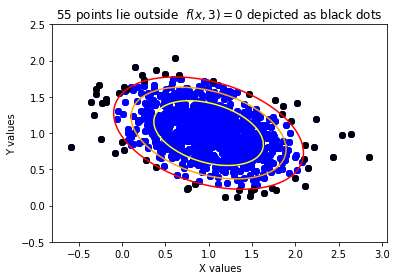

In [352]:
import numpy as np
import matplotlib.pyplot as plt

# Given
mean = [1,1]
cov = [[0.1 , -0.05],[-0.05, 0.2]]
p = np.random.multivariate_normal(mean,cov,1000)

def func(x,r):
    temp = np.subtract(x,mean)
    upper = np.dot(np.dot(np.matrix.transpose(temp),np.linalg.inv(cov)),temp)
    return upper/2 -r

# Gather points
min = -0.5
max = 2.5
res = 100
x = np.linspace(min, max, res)
y = np.linspace(min, max, res)
X, Y = np.meshgrid(x,y)

# Calculate different levels, and which points should be blue/black
levels = []
blue = []
black = []

for r in range (1,4):
    level = []
    for i in range (len(x)):
        rows = []
        for j in range (len(y)):
            point = [x[i],y[j]]
            rows.append(func(point,r))
        level.append(rows)
    levels.append(level)
    
    for k in range (len(p)):
        result = func(p[k],r)
        if result > 0 and r ==3:
            black.append(p[k])
        else:
            blue.append(p[k])
        
# Use the layers to plot the level sets 
plt.contour(X,Y,np.array(levels[0]),[0], colors= 'yellow')
plt.contour(X,Y,np.array(levels[1]),[0], colors= 'orange')
plt.contour(X,Y,np.array(levels[2]),[0], colors = 'red')


# Scatter plot the blue and black points respectively on top of the level sets         
plt.scatter([row[1] for row in blue],[row[0] for row in blue], color='blue')
plt.scatter([row[1] for row in black],[row[0] for row in black], color='black')
plt.title("%i points lie outside  $f(x,3)=0$ depicted as black dots" % len(black))
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

The innermost yellow circle corresponds to the contour of the first layer ($f(x,1)=0$), the second orange circle corresponds to the contour of the second layer ($f(x,2)=0$), and finally the red circle corresponds to the third layer contour ($f(x,3)=0$). The black points are supposed to be the points that lie outside the $f(x,3)=0$ contour whilst all the blue points are supposed to be inside. As we can see in the plot, this is the case and we can therefore confidently say that this plot is correct.

# [Covariance and correlation, 5 points]
Load dataset0.txt ($X$) containing 1074 data points
each having 12 features related to US schools. Compute the covariance
and correlation matrix for $X$. Scale each feature
in $X$ between $[0, 1]$ to obtain a new dataset $Y$. Compute the
covariance and correlation matrices for $X$ and $Y$, and plot them (e.g. as colormaps).
What do you observe? Show a scatter plot of the pair of features in $Y$ having minimum
correlation, indicating in the title the feature indices and the
correlation value. Submit the plots, comments and your implementation.

(array([11]), array([7]))


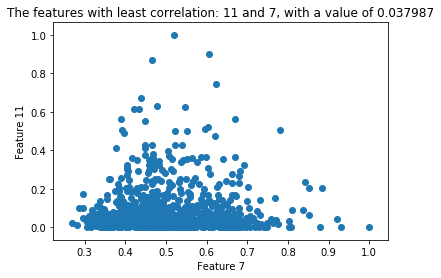

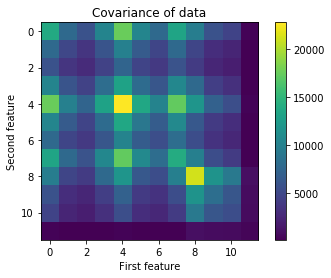

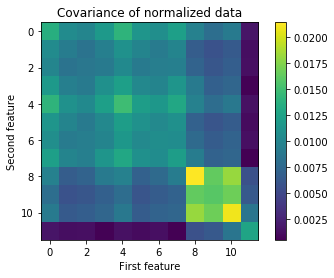

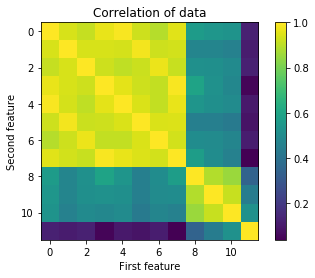

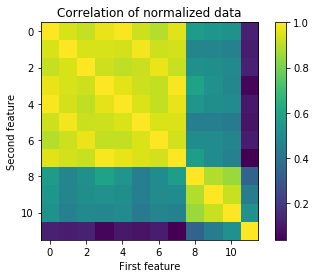

In [359]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt("/home/greedo/Documents/TDA231/dataset0.txt")
#print (data.shape)
#print (data[0])

newdata =np.zeros(data.shape)
for col in range (0,data.shape[1]):
    max = np.max(data[:,col])
    newdata[:,col] = data[:,col]/max

X = data.T     
Y = newdata.T
 
# Correlation and covariance matrices    
cov = np.cov(X)
cov_scaled = np.cov(Y)
corr = np.corrcoef(X)
corr_scaled = np.corrcoef(Y)

# Find features with minimim correlation
min_value = corr_scaled.min()
index = np.where(corr_scaled == min_value)

# Get the data for those two features
feature_col1 = Y[index[1],:]
feature_col2 = Y[index[0],:]

# Scatter plot of the two features
plt.figure()
plt.scatter(feature_col1,feature_col2)
plt.title("The features with least correlation: %i and %i, with a value of %f" % (index[0], index[1], min_value))
plt.xlabel("Feature %i" % index[1])
plt.ylabel("Feature %i" % index[0])


# Covariance of data
plt.figure()
plt.imshow(cov, interpolation='nearest')
plt.colorbar()
plt.title("Covariance of data")
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Covariance of normalized data
plt.figure()
plt.imshow(cov_scaled, interpolation='nearest')
plt.colorbar()
plt.title("Covariance of normalized data")
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Correlation of data
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.title("Correlation of data")
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Correlation of normalized data
plt.figure()
plt.imshow(corr_scaled)
plt.colorbar()
plt.title("Correlation of normalized data")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.show()


First and foremost we scaled the input data to have values between 0 and 1, then we created the covariance matrix to find the two features with the least correlation. These two features were scatter plotted against each other in the first plot, clearly showing that there is very little correlation between the two sets. The two features with the least correlation were feature 8 (index 7) and feature 12 (index 11), whereas the minimum correlation has a value of approximately 0.00038.

In the covariance plots, we see a clear difference between the normalized and non-normalized data. In the non-normalized case, we see a high covariance for both feature 4 and 8 towards themselves whilst most other feature combinations show barely any covariance, which means that those two features most likely contain very high values.

For the normalized case, when every feature is scaled it reduces the amount of possible variance. Because of all the features having the same scale, the probability of them having a correlating covariance increasing, therefore making the plot "brighter" as a whole.

For the correlation plots, wee see no difference between the normalized and non-normalized data. This is no surprise as changing the scale of the data shouldn't change the correlation, as the relation between the values in the sets are constant no matter the scale.
